In [1]:
sys.path.insert(0, './common')

import sys
import wave
import qlearning_target_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'collectible/Wave'
env = wave.WaveEnv(env_path)

WAVE environment created.


In [3]:
model = qlearning_target_model.QLearning(127, 2, 1024)

In [4]:
save_path = './results/collectible/BEST-QLEARNING-TARGET'
model.set_model_save_path(save_path)

In [8]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


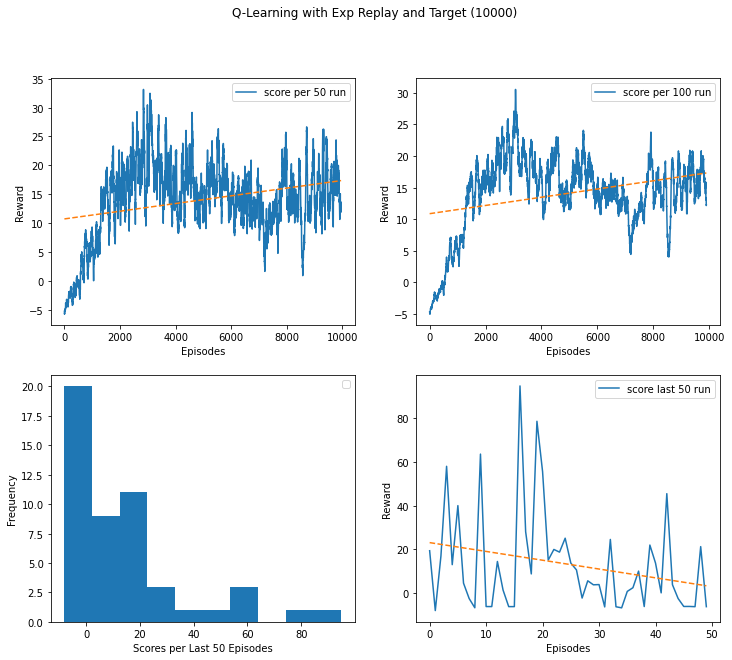

EPOCH: 9999, total reward: -6.260000228881836, timestep: 26, epsilon: 0.04996170339735633


In [5]:
model.set_train_params(max_step=1000)
model.train(env, 10000)

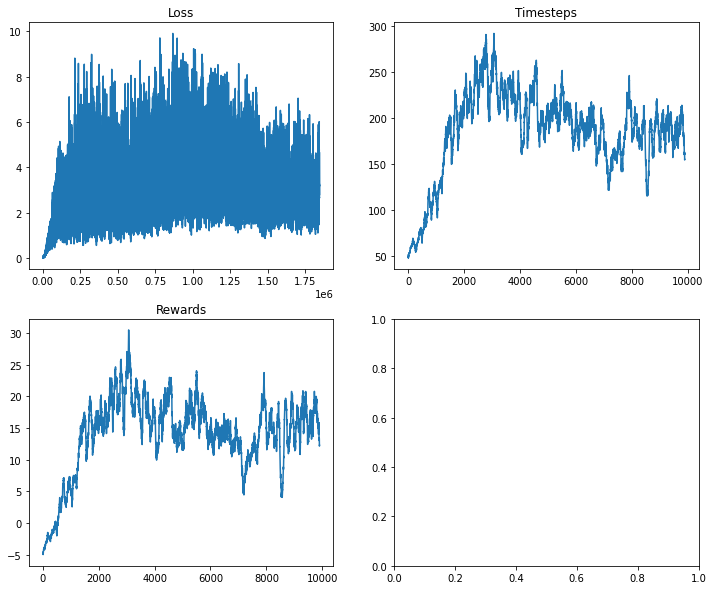

In [14]:
model.plot_train_memory(smooth=100)

In [8]:
model.save_model()

Model saved
Training history saved


In [8]:
env = wave.WaveEnv(env_path, 5)
model.test(env)

WAVE environment created.


(12.635770419612527, 188)

In [5]:
env.close()